In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from classy import Class

In [2]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1]
cosmo100 = Class()
cosmo100.set({'output':'dTk, lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'radiation_streaming_approximation':3,
           'l_max_g':100,
           'l_max_ur':100,
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':40,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'l_logstep':10,
           'l_linstep':300,
           'P_k_max_h/Mpc' : 0.1,
           'lensing':'no',
           'evolver':1,
           'a_init_nbody': 1./101.
            })
cosmo100.compute()



In [3]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1]
cosmo500 = Class()
cosmo500.set({'output':'dTk, lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'radiation_streaming_approximation':3,
           'l_max_g':100,
           'l_max_ur':100,
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':40,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'l_logstep':10,
           'l_linstep':300,
           'P_k_max_h/Mpc' : 0.1,
           'lensing':'no',
           'evolver':1,
           'a_init_nbody': 1./501.
            })
cosmo500.compute()

In [4]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1]
cosmo50 = Class()
cosmo50.set({'output':'dTk, lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'radiation_streaming_approximation':3,
           'l_max_g':100,
           'l_max_ur':100,
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':40,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'l_logstep':10,
           'l_linstep':300,
           'P_k_max_h/Mpc' : 0.1,
           'lensing':'no',
           'evolver':1,
           'a_init_nbody': 1./51.
            })
cosmo50.compute()

In [5]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1]
cosmo1000 = Class()
cosmo1000.set({'output':'dTk, lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'radiation_streaming_approximation':3,
           'l_max_g':100,
           'l_max_ur':100,
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':40,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'l_logstep':10,
           'l_linstep':300,
           'P_k_max_h/Mpc' : 0.1,
           'lensing':'no',
           'evolver':1,
           'a_init_nbody': 1./1001.
            })
cosmo1000.compute()

In [6]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1]
cosmo0 = Class()
cosmo0.set({'output':'dTk, lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'radiation_streaming_approximation':3,
           'l_max_g':100,
           'l_max_ur':100,
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':40,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'l_logstep':10,
           'l_linstep':300,
           'P_k_max_h/Mpc' : 0.1,
           'lensing':'no',
           'evolver':1,
           'a_init_nbody':1.
            })
cosmo0.compute()

 reio affects the small k after z = 10, baryons affect the small scales significantly
 is there a sign difference between 3hc term?

In [7]:
tks0_500 = cosmo500.get_transfer(z_pk[-1])
tks5_500 = cosmo500.get_transfer(z_pk[-2])
tks10_500 = cosmo500.get_transfer(z_pk[-3])
tks50_500 = cosmo500.get_transfer(z_pk[-4])
tks75_500 = cosmo500.get_transfer(z_pk[-5])
tks100_500 = cosmo500.get_transfer(z_pk[-6])
tks200_500 = cosmo500.get_transfer(z_pk[-7])
tks0_50 = cosmo50.get_transfer(z_pk[-1])
tks5_50 = cosmo50.get_transfer(z_pk[-2])
tks10_50 = cosmo50.get_transfer(z_pk[-3])
tks50_50 = cosmo50.get_transfer(z_pk[-4])
tks75_50 = cosmo50.get_transfer(z_pk[-5])
tks100_50 = cosmo50.get_transfer(z_pk[-6])
tks200_50 = cosmo50.get_transfer(z_pk[-7])
tks0_1000 = cosmo1000.get_transfer(z_pk[-1])
tks5_1000 = cosmo1000.get_transfer(z_pk[-2])
tks10_1000 = cosmo1000.get_transfer(z_pk[-3])
tks50_1000 = cosmo1000.get_transfer(z_pk[-4])
tks75_1000 = cosmo1000.get_transfer(z_pk[-5])
tks100_1000 = cosmo1000.get_transfer(z_pk[-6])
tks200_1000 = cosmo1000.get_transfer(z_pk[-7])
tks0_100 = cosmo100.get_transfer(z_pk[-1])
tks5_100 = cosmo100.get_transfer(z_pk[-2])
tks10_100 = cosmo100.get_transfer(z_pk[-3])
tks50_100 = cosmo100.get_transfer(z_pk[-4])
tks75_100 = cosmo100.get_transfer(z_pk[-5])
tks100_100 = cosmo100.get_transfer(z_pk[-6])
tks200_100 = cosmo100.get_transfer(z_pk[-7])
tks0_0 = cosmo0.get_transfer(z_pk[-1])
tks5_0 = cosmo0.get_transfer(z_pk[-2])
tks10_0 = cosmo0.get_transfer(z_pk[-3])
tks50_0 = cosmo0.get_transfer(z_pk[-4])
tks75_0 = cosmo0.get_transfer(z_pk[-5])
tks100_0 = cosmo0.get_transfer(z_pk[-6])
tks200_0 = cosmo0.get_transfer(z_pk[-7])
print tks0_500.viewkeys()
z_pk[-5]

dict_keys(['d_tot', 'L_prime', 'L', 'd_ur', 'd_cdm', 'd_b', 'd_g', 'k (h/Mpc)'])


75.0

(0.0001, 1000000)

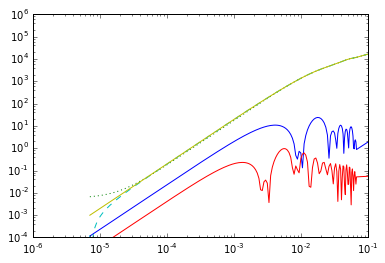

In [8]:
k = tks0_500['k (h/Mpc)']*cosmo500.h()
plt.loglog(k,np.abs( k*tks0_500['L']),
           k,np.abs( tks0_500['L_prime'] ),':',
           k,np.abs( k*tks0_100['L']),
           k,np.abs( tks0_100['L_prime'] ),'--',
           k,np.abs( k*tks0_0['L']),
           k,np.abs( tks0_0['L_prime'] )
           )
plt.ylim([0.0001,1000000])

(0.1, 100000000)

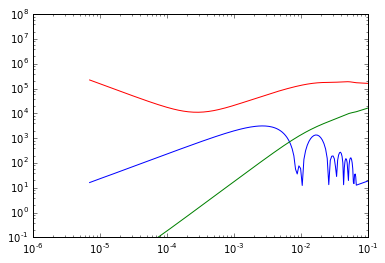

In [9]:
k = tks0_500['k (h/Mpc)']*cosmo500.h()
plt.loglog(k,np.abs( tks0_500['L']),
           k,np.abs( tks0_500['L_prime'] ),
           k,np.abs(1/k* tks0_500['d_cdm'] ))
plt.ylim([0.1,100000000])

(0.0001, 0.05)

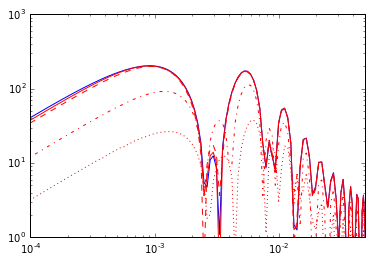

In [10]:
k = tks0_100['k (h/Mpc)']*cosmo500.h()
plt.loglog(k,np.abs(tks0_100['L_prime']/tks0_100['L_prime']  *tks0_100['L'] ),'b',
           k,np.abs(tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L'] ),'r',
          k,np.abs(tks0_100['L_prime']/tks10_100['L_prime'] *tks10_100['L'] ),'r--',
          k,np.abs(tks0_100['L_prime']/tks50_100['L_prime']*tks50_100['L'] ),'r-.',
           k,np.abs(tks0_100['L_prime']/tks75_100['L_prime']*tks75_100['L'] ),'r:'
          )
plt.ylim([1,1000])
plt.xlim([0.0001,0.05])

(0.0001, 0.05)

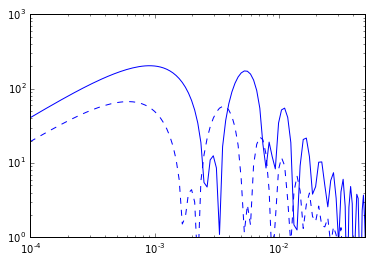

In [11]:
k = tks0_100['k (h/Mpc)']*cosmo500.h()
plt.loglog(
           k,np.abs( tks0_100['L'] ),'b',
           k,np.abs( tks0_50['L'] ),'b--'
          )
plt.ylim([1,1000])
plt.xlim([0.0001,0.05])

what about baryons in the evolving framweork, i need the actual growth functions!

(5e-05, 0.1)

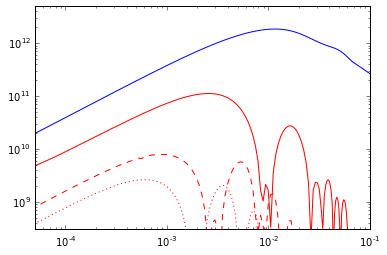

In [12]:
k = tks0_100['k (h/Mpc)']*cosmo500.h()
plt.loglog(
           k,np.abs((tks0_500['L_prime']- k*tks0_500['L']) *(tks0_500['L_prime'] - k*tks0_500['L']) /k/k/k 
                    - tks0_500['L_prime']*tks0_500['L_prime'] /k/k/k),'r',
           k,np.abs((tks0_100['L_prime']- k*tks0_100['L']) *(tks0_100['L_prime'] - k*tks0_100['L']) /k/k/k 
                    - tks0_100['L_prime']*tks0_100['L_prime'] /k/k/k),'r--',
           k,np.abs((tks0_50['L_prime']- k*tks0_50['L']) *(tks0_50['L_prime'] - k*tks0_50['L']) /k/k/k 
                    - tks0_50['L_prime']*tks0_50['L_prime'] /k/k/k),'r:',
           k,np.abs((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k),'b'
            )
plt.ylim([300000000,5000000000000])
plt.xlim([0.00005,0.1])

(0.0001, 0.1)

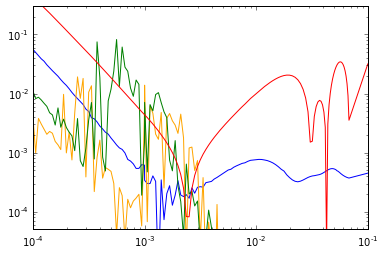

In [13]:
k = tks0_100['k (h/Mpc)']*cosmo500.h()
plt.loglog(
           k,np.abs(((tks0_500['L_prime']- k*tks0_500['L']) *(tks0_500['L_prime'] - k*tks0_500['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'b',
            k,np.abs(((tks0_50['L_prime']- k*tks0_50['L']) *(tks0_50['L_prime'] - k*tks0_50['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'orange',
            k,np.abs(((tks0_100['L_prime']- k*tks0_100['L']) *(tks0_100['L_prime'] - k*tks0_100['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'g',
            k,np.abs(((tks0_1000['L_prime']- k*tks0_1000['L']) *(tks0_1000['L_prime'] - k*tks0_1000['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'r'
          
            )
plt.ylim([0.00005,0.3])
plt.xlim([0.0001,0.1])

In [14]:
pts0 = cosmo0.get_perturbations()['scalar']
pts100 = cosmo100.get_perturbations()['scalar']
pts500 = cosmo500.get_perturbations()['scalar']
print len(pts0)
xx = 3
pt0 = pts0[xx]
pt100 = pts100[xx]
pt500 = pts500[xx]
print pt100.viewkeys()

4
dict_keys(['L_prime', 'B_nm', 'A_nm', 'delta_ur', 'delta_cdm', 'theta_cdm', 'theta_ur', 'phi', 'psi', 'H_T_nm', 'shear_ur', 'L', 'delta_g', 'H_L_nm', 'delta_b', 'a', 'theta_g', 'pol0_g', 'theta_b', 'shear_g', 'tau [Mpc]', 'delta_N', 'pol2_g', 'pol1_g'])


(400, 14000)

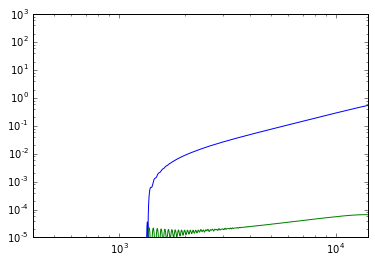

In [15]:
tau = pt100['tau [Mpc]']
plt.loglog(np.abs(tau),np.abs(pt100['L']),np.abs(tau),np.abs(pt100['L_prime']))
plt.ylim([0.00001,1000])
plt.xlim([400,14000])

(0.0001, 1)

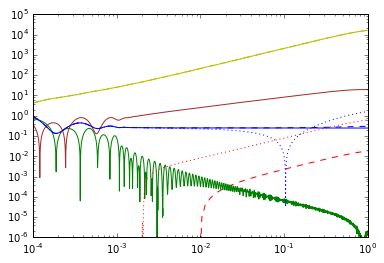

In [16]:
tau100 = pt100['a']
tau500 = pt500['a']
tau0 = pt0['a']

plt.loglog(
           np.abs(tau500),np.abs(pt500['delta_N']),'y:', 
           np.abs(tau100),np.abs(pt100['delta_N']),'y--',
           np.abs(tau0),np.abs(pt0['delta_N']),'y', 
           np.abs(tau100),np.abs(pt100['H_L_nm']),'r--',
           np.abs(tau100),np.abs(pt100['H_T_nm']),'b--',
           np.abs(tau0),np.abs(pt0['A_nm']),'g',
           np.abs(tau0),np.abs(pt0['B_nm']),'brown',
           np.abs(tau0),np.abs(pt0['H_T_nm']),'b',
           np.abs(tau500),np.abs(pt500['H_L_nm']),'r:',
           np.abs(tau500),np.abs(pt500['H_T_nm']),'b:'
          )

plt.ylim([0.000001,100000])
plt.xlim([0.0001,1])